In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from src.data_splitting import train_val_test_split, one_hot_encode
from src.models import plot_loss, NeuralNetwork

X_images = np.load("X_images.npy")
y_images = np.load("y_images.npy")


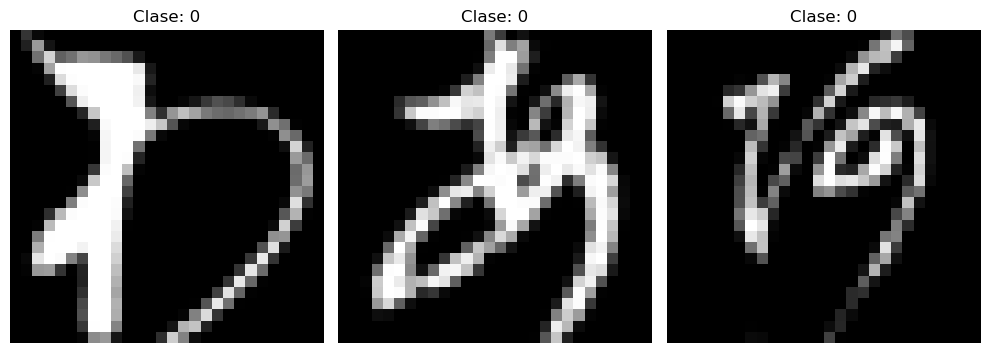

In [21]:
def plot_images(X, y, n=3):
    plt.figure(figsize=(10, 4))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(X[i].reshape(28, 28), cmap="gray")
        plt.title(f"Clase: {y[i]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

plot_images(X_images, y_images)

X_images = X_images / 255.0

# División
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(X_images, y_images)


Epoch 0: Train Loss = 4.0656, Val Loss = 4.0608
Epoch 10: Train Loss = 4.0057, Val Loss = 4.0091
Epoch 20: Train Loss = 3.9639, Val Loss = 3.9732
Epoch 30: Train Loss = 3.9319, Val Loss = 3.9464
Epoch 40: Train Loss = 3.9061, Val Loss = 3.9247
Epoch 50: Train Loss = 3.8842, Val Loss = 3.9062
Epoch 60: Train Loss = 3.8648, Val Loss = 3.8901
Epoch 70: Train Loss = 3.8470, Val Loss = 3.8755
Epoch 80: Train Loss = 3.8304, Val Loss = 3.8623
Epoch 90: Train Loss = 3.8148, Val Loss = 3.8500
Epoch 100: Train Loss = 3.7998, Val Loss = 3.8383
Epoch 110: Train Loss = 3.7856, Val Loss = 3.8269
Epoch 120: Train Loss = 3.7718, Val Loss = 3.8158
Epoch 130: Train Loss = 3.7581, Val Loss = 3.8046
Epoch 140: Train Loss = 3.7445, Val Loss = 3.7937
Epoch 150: Train Loss = 3.7309, Val Loss = 3.7828
Epoch 160: Train Loss = 3.7173, Val Loss = 3.7719
Epoch 170: Train Loss = 3.7034, Val Loss = 3.7609
Epoch 180: Train Loss = 3.6893, Val Loss = 3.7497
Epoch 190: Train Loss = 3.6749, Val Loss = 3.7384
Epoch 200: 

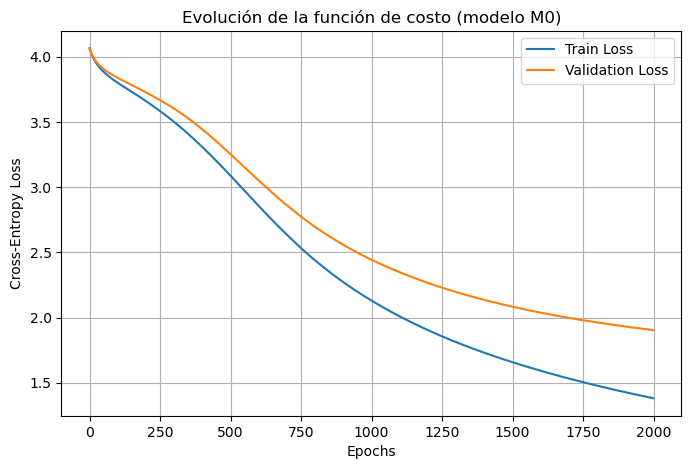

In [23]:
num_classes = len(np.unique(y_train))
y_train_oh = one_hot_encode(y_train, num_classes)
y_val_oh = one_hot_encode(y_val, num_classes)

input_dim = X_train.shape[1]
output_dim = num_classes

model_M0 = NeuralNetwork(layer_sizes=[input_dim, 100, 80, output_dim], learning_rate=0.01)
history = model_M0.train(X_train, y_train_oh, X_val, y_val_oh, epochs=2000)

plot_loss(history)